In [1]:
import pandas as pd
import requests
import folium
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
resp = requests.get('http://localhost:8000/api/stats/busan')
df = pd.DataFrame(resp.json())
df

,id,stat_nm,stat_id,chger_id,chger_type,addr,addr_detail,location,lat,lng,...,note,limit_yn,limit_detail,del_yn,del_detail,traffic_yn,year,floor_num,floor_type,created_at
0,1,부산 어린이 대공원,ME181207,01,06,부산광역시 부산진구 성지곡로 3,null,null,35.183113,129.045980,...,None,N,None,N,None,N,2018,1,F,2025-12-21T08:32:03.767104
1,2,부산시 교육청,ME181208,01,06,부산광역시 부산진구 화지로 12,null,null,35.176130,129.063927,...,None,N,None,N,None,N,2018,1,F,2025-12-21T08:32:03.767104
2,3,부산아시아드보조경기장VIP주차장,ME181210,01,06,부산광역시 연제구 거제동 1312,null,null,35.188352,129.055542,...,None,N,None,N,None,N,2018,1,F,2025-12-21T08:32:03.767104
3,4,부산아시아드보조경기장VIP주차장,ME181210,02,06,부산광역시 연제구 거제동 1312,null,null,35.188352,129.055542,...,None,N,None,N,None,N,2018,1,F,2025-12-21T08:32:03.767104
4,5,부산아시아드보조경기장VIP주차장,ME181210,11,04,부산광역시 연제구 거제동 1312,null,null,35.188352,129.055542,...,None,N,None,N,None,N,2018,1,F,2025-12-21T08:32:03.767104
5,6,부산아시아드보조경기장VIP주차장,ME181210,12,04,부산광역시 연제구 거제동 1312,null,null,35.188352,129.055542,...,None,N,None,N,None,N,2018,1,F,2025-12-21T08:32:03.767104
6,7,부산아시아드보조경기장VIP주차장,ME181210,51,04,부산광역시 연제구 거제동 1312,null,null,35.188352,129.055542,...,None,N,None,N,None,N,2018,1,F,2025-12-21T08:32:03.767104
7,8,부산아시아드보조경기장VIP주차장,ME181210,52,04,부산광역시 연제구 거제동 1312,null,null,35.188352,129.055542,...,None,N,None,N,None,N,2018,1,F,2025-12-21T08:32:03.767104
8,9,롯데마트 광복점,ME181225,01,06,부산광역시 중구 중앙대로2 (중앙동7가),null,null,35.097858,129.036146,...,None,N,None,N,None,N,2018,1,F,2025-12-21T08:32:03.767104
9,10,김해공항,ME181250,01,06,부산광역시 강서구 공항진입로 108,null,null,35.172923,128.949117,...,None,N,None,N,None,N,2018,1,F,2025-12-21T08:32:03.767104


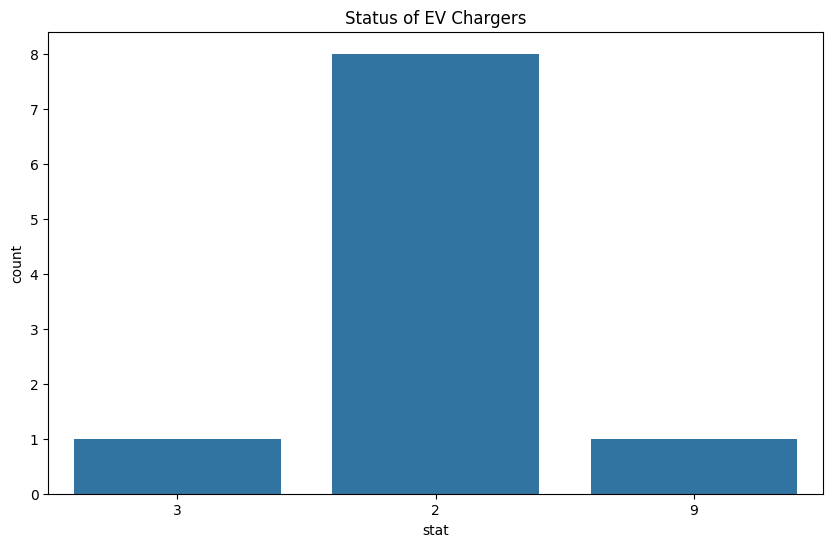

In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='stat')
plt.title('Status of EV Chargers')
plt.show()

In [ ]:
m = folium.Map(location=[df['lat'].mean(), df['lng'].mean()], zoom_start=12)
for _, row in df.head(37).iterrows():
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=row['stat_nm'],
        icon=folium.Icon(color='green' if row['stat'] == '2' else 'red')
    ).add_to(m)
m.save("map.html")